In [1]:
#Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\bodak\Downloads\Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

In [5]:
X = df.iloc[:,3:-1]
Y = df.iloc[:,-1]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder , StandardScaler

In [9]:
oe = OrdinalEncoder()
sc = StandardScaler()

X.loc[:,'Geography':'Gender'] = oe.fit_transform(X.loc[:,'Geography':'Gender'])

In [10]:
X = sc.fit_transform(X)

In [11]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
ann = Sequential()


ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=20,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss = 'binary_crossentropy')
ann.fit(X_train,Y_train,epochs=250)

Epoch 1/250
250/250 [==============================] - 3s 3ms/step - loss: 0.4636
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4103
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3839
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3656
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3565
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3514
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3485
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3466
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3439
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3414
Epoch 11/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3388
Epoch 12/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3378
Epoch 13/250


250/250 [==============================] - 1s 4ms/step - loss: 0.2977
Epoch 100/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2974
Epoch 101/250
250/250 [==============================] - 1s 5ms/step - loss: 0.2971
Epoch 102/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2970
Epoch 103/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2966
Epoch 104/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2964
Epoch 105/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2947
Epoch 106/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2950
Epoch 107/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2947
Epoch 108/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2949
Epoch 109/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2952
Epoch 110/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2951
Epoch 

250/250 [==============================] - 1s 3ms/step - loss: 0.2810
Epoch 197/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2809
Epoch 198/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2789
Epoch 199/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2805
Epoch 200/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2801
Epoch 201/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2797
Epoch 202/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2807
Epoch 203/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2806
Epoch 204/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2780
Epoch 205/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2788
Epoch 206/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2785
Epoch 207/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2788
Epoch 

In [16]:
loss = pd.DataFrame(ann.history.history)

In [17]:
loss

,loss
0,0.463578
1,0.410310
2,0.383916
3,0.365572
4,0.356522
...,...
245,0.274455
246,0.275797
247,0.275599
248,0.274670


<AxesSubplot:>

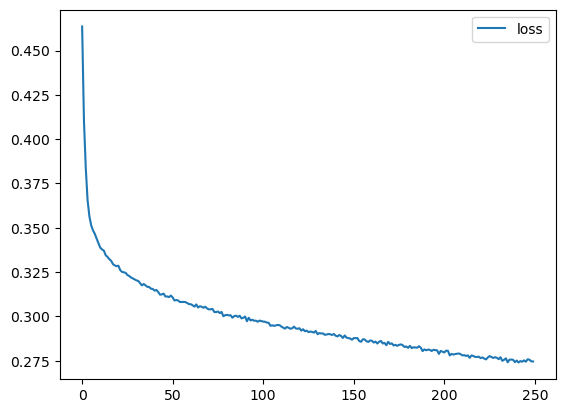

In [18]:
loss.plot()

In [19]:
ann = Sequential()


ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=20,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss = 'binary_crossentropy')
ann.fit(X_train,Y_train,validation_data=(X_test,Y_test) ,epochs=250)

Epoch 1/250
250/250 [==============================] - 4s 8ms/step - loss: 0.4993 - val_loss: 0.4300
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4178 - val_loss: 0.4039
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3917 - val_loss: 0.3832
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3709 - val_loss: 0.3630
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3595 - val_loss: 0.3519
Epoch 6/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3524 - val_loss: 0.3498
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3485 - val_loss: 0.3449
Epoch 8/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3459 - val_loss: 0.3425
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3430 - val_loss: 0.3426
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3413 - val_lo

250/250 [==============================] - 1s 4ms/step - loss: 0.3003 - val_loss: 0.3457
Epoch 82/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3023 - val_loss: 0.3437
Epoch 83/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3007 - val_loss: 0.3447
Epoch 84/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3001 - val_loss: 0.3469
Epoch 85/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2997 - val_loss: 0.3441
Epoch 86/250
250/250 [==============================] - 1s 5ms/step - loss: 0.2996 - val_loss: 0.3480
Epoch 87/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2991 - val_loss: 0.3482
Epoch 88/250
250/250 [==============================] - 1s 5ms/step - loss: 0.2989 - val_loss: 0.3484
Epoch 89/250
250/250 [==============================] - 1s 5ms/step - loss: 0.2980 - val_loss: 0.3546
Epoch 90/250
250/250 [==============================] - 1s 5ms/step - loss: 0.2980 - val_loss: 

Epoch 161/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2831 - val_loss: 0.3783
Epoch 162/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2816 - val_loss: 0.3775
Epoch 163/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2826 - val_loss: 0.3806
Epoch 164/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2827 - val_loss: 0.3710
Epoch 165/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2823 - val_loss: 0.3731
Epoch 166/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2815 - val_loss: 0.3756
Epoch 167/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2814 - val_loss: 0.3760
Epoch 168/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2817 - val_loss: 0.3723
Epoch 169/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2813 - val_loss: 0.3783
Epoch 170/250
250/250 [==============================] - 1s 4ms/step - lo

250/250 [==============================] - 1s 4ms/step - loss: 0.2700 - val_loss: 0.3923
Epoch 241/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2716 - val_loss: 0.3946
Epoch 242/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2697 - val_loss: 0.3905
Epoch 243/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2702 - val_loss: 0.3933
Epoch 244/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2710 - val_loss: 0.3954
Epoch 245/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2710 - val_loss: 0.3956
Epoch 246/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2703 - val_loss: 0.3942
Epoch 247/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2700 - val_loss: 0.3981
Epoch 248/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2700 - val_loss: 0.3994
Epoch 249/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2701 - v

In [20]:
loss = pd.DataFrame(ann.history.history)

<AxesSubplot:>

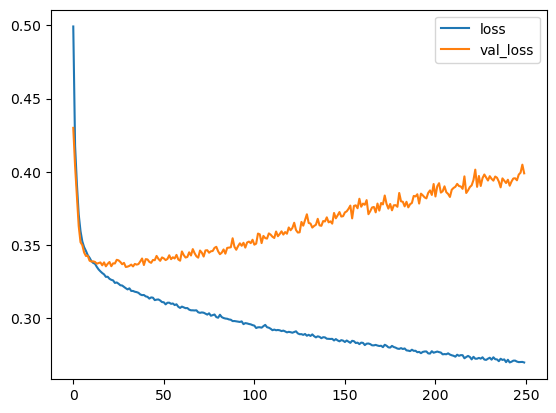

In [21]:
loss.plot()

# Hyperparameter tunning 

In [22]:
#Early Stopping

In [23]:
from tensorflow.keras.layers import Dropout

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early = EarlyStopping(monitor='vol_loss',mode='min',patience=5)

In [26]:
early

In [27]:
ann = Sequential()

ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(X_train,Y_train,validation_data=(X_test,Y_test),callbacks=[early],epochs=250)

Epoch 1/250
250/250 [==============================] - 3s 7ms/step - loss: 0.8030 - val_loss: 0.6492
Epoch 2/250
250/250 [==============================] - 1s 5ms/step - loss: 0.6190 - val_loss: 0.5939
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.5758 - val_loss: 0.5588
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.5431 - val_loss: 0.5279
Epoch 5/250
250/250 [==============================] - 1s 5ms/step - loss: 0.5156 - val_loss: 0.5029
Epoch 6/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4925 - val_loss: 0.4811
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4721 - val_loss: 0.4629
Epoch 8/250
250/250 [==============================] - 1s 5ms/step - loss: 0.4534 - val_loss: 0.4454
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4354 - val_loss: 0.4283
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4195 - val_lo

Epoch 29/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3530 - val_loss: 0.3492
Epoch 30/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3520 - val_loss: 0.3493
Epoch 31/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3511 - val_loss: 0.3472
Epoch 32/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3501 - val_loss: 0.3474
Epoch 33/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3493 - val_loss: 0.3467
Epoch 34/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3483 - val_loss: 0.3474
Epoch 35/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3478 - val_loss: 0.3449
Epoch 36/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3468 - val_loss: 0.3448
Epoch 37/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3463 - val_loss: 0.3449
Epoch 38/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3461

Epoch 57/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3376 - val_loss: 0.3359
Epoch 58/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3368 - val_loss: 0.3355
Epoch 59/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3362 - val_loss: 0.3340
Epoch 60/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3362 - val_loss: 0.3333
Epoch 61/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3357 - val_loss: 0.3347
Epoch 62/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3354 - val_loss: 0.3320
Epoch 63/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3348 - val_loss: 0.3331
Epoch 64/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3345 - val_loss: 0.3332
Epoch 65/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3336 - val_loss: 0.3339
Epoch 66/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3344

Epoch 85/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3314 - val_loss: 0.3316
Epoch 86/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3317 - val_loss: 0.3308
Epoch 87/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3313 - val_loss: 0.3311
Epoch 88/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3310 - val_loss: 0.3316
Epoch 89/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3307 - val_loss: 0.3315
Epoch 90/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3306 - val_loss: 0.3326
Epoch 91/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3308 - val_loss: 0.3314
Epoch 92/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3312 - val_loss: 0.3313
Epoch 93/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3306 - val_loss: 0.3314
Epoch 94/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3308

Epoch 113/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3292 - val_loss: 0.3301
Epoch 114/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3288 - val_loss: 0.3307
Epoch 115/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - val_loss: 0.3290
Epoch 116/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3286 - val_loss: 0.3311
Epoch 117/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - val_loss: 0.3319
Epoch 118/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3287 - val_loss: 0.3307
Epoch 119/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3286 - val_loss: 0.3317
Epoch 120/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3289 - val_loss: 0.3298
Epoch 121/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3285 - val_loss: 0.3317
Epoch 122/250
250/250 [==============================] - 1s 4ms/step - lo

250/250 [==============================] - 1s 4ms/step - loss: 0.3279 - val_loss: 0.3317
Epoch 141/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3280 - val_loss: 0.3302
Epoch 142/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3275 - val_loss: 0.3362
Epoch 143/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3282 - val_loss: 0.3322
Epoch 144/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3287 - val_loss: 0.3307
Epoch 145/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3285 - val_loss: 0.3293
Epoch 146/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3266 - val_loss: 0.3327
Epoch 147/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3277 - val_loss: 0.3299
Epoch 148/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3279 - val_loss: 0.3298
Epoch 149/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3280 - v

250/250 [==============================] - 1s 4ms/step - loss: 0.3271 - val_loss: 0.3299
Epoch 169/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3270 - val_loss: 0.3312
Epoch 170/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3270 - val_loss: 0.3310
Epoch 171/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3271 - val_loss: 0.3296
Epoch 172/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3268 - val_loss: 0.3327
Epoch 173/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3269 - val_loss: 0.3316
Epoch 174/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3265 - val_loss: 0.3312
Epoch 175/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3264 - val_loss: 0.3300
Epoch 176/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3266 - val_loss: 0.3312
Epoch 177/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3269 - v

250/250 [==============================] - 1s 4ms/step - loss: 0.3259 - val_loss: 0.3321
Epoch 197/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3260 - val_loss: 0.3312
Epoch 198/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3255 - val_loss: 0.3311
Epoch 199/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3261 - val_loss: 0.3315
Epoch 200/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3256 - val_loss: 0.3307
Epoch 201/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3260 - val_loss: 0.3310
Epoch 202/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3265 - val_loss: 0.3304
Epoch 203/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3255 - val_loss: 0.3331
Epoch 204/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3258 - val_loss: 0.3309
Epoch 205/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3257 - v

250/250 [==============================] - 1s 4ms/step - loss: 0.3246 - val_loss: 0.3308
Epoch 225/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3255 - val_loss: 0.3306
Epoch 226/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3251 - val_loss: 0.3331
Epoch 227/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3256 - val_loss: 0.3324
Epoch 228/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3249 - val_loss: 0.3322
Epoch 229/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3255 - val_loss: 0.3321
Epoch 230/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3257 - val_loss: 0.3313
Epoch 231/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3250 - val_loss: 0.3317
Epoch 232/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3252 - val_loss: 0.3343
Epoch 233/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3258 - v

<AxesSubplot:>

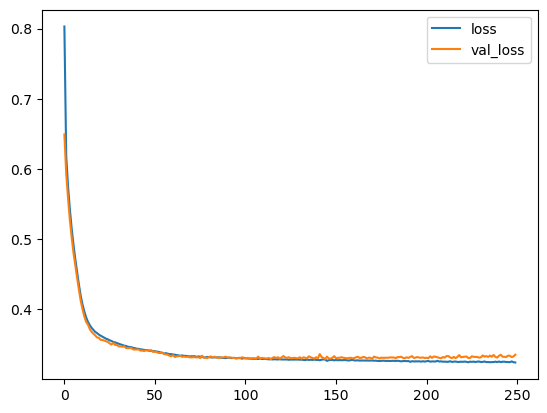

In [28]:
early_loss  = pd.DataFrame(ann.history.history)

early_loss.plot()

# DropOut

In [ ]:
ann = Sequential()

ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=15,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=250,callbacks=[early])

Epoch 1/250
250/250 [==============================] - 2s 5ms/step - loss: 0.4867 - val_loss: 0.4437
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4245 - val_loss: 0.4082
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3919 - val_loss: 0.3717
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3664 - val_loss: 0.3552
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3561 - val_loss: 0.3505
Epoch 6/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3504 - val_loss: 0.3464
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3461 - val_loss: 0.3465
Epoch 8/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3437 - val_loss: 0.3423
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3415 - val_loss: 0.3409
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3392 - val_lo

Epoch 29/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3204 - val_loss: 0.3380
Epoch 30/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3206 - val_loss: 0.3388
Epoch 31/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3191 - val_loss: 0.3382
Epoch 32/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3196 - val_loss: 0.3405
Epoch 33/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3183 - val_loss: 0.3386
Epoch 34/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3183 - val_loss: 0.3363
Epoch 35/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3176 - val_loss: 0.3393
Epoch 36/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3176 - val_loss: 0.3392
Epoch 37/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3165 - val_loss: 0.3395
Epoch 38/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3175

Epoch 57/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3100 - val_loss: 0.3433
Epoch 58/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3099 - val_loss: 0.3440
Epoch 59/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3090 - val_loss: 0.3413
Epoch 60/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3097 - val_loss: 0.3411
Epoch 61/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3092 - val_loss: 0.3434
Epoch 62/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3090 - val_loss: 0.3451
Epoch 63/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3088 - val_loss: 0.3434
Epoch 64/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3080 - val_loss: 0.3414
Epoch 65/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3085 - val_loss: 0.3435
Epoch 66/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3081

Epoch 85/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3035 - val_loss: 0.3442
Epoch 86/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3025 - val_loss: 0.3479
Epoch 87/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3022 - val_loss: 0.3463
Epoch 88/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3025 - val_loss: 0.3456
Epoch 89/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3023 - val_loss: 0.3447
Epoch 90/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3023 - val_loss: 0.3478
Epoch 91/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3018 - val_loss: 0.3481
Epoch 92/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3021 - val_loss: 0.3505
Epoch 93/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3018 - val_loss: 0.3478
Epoch 94/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3021

Epoch 113/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2982 - val_loss: 0.3575
Epoch 114/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2987 - val_loss: 0.3539
Epoch 115/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2979 - val_loss: 0.3526
Epoch 116/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2985 - val_loss: 0.3567
Epoch 117/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2988 - val_loss: 0.3520
Epoch 118/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2971 - val_loss: 0.3532
Epoch 119/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2980 - val_loss: 0.3511
Epoch 120/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2970 - val_loss: 0.3533
Epoch 121/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2979 - val_loss: 0.3524
Epoch 122/250
250/250 [==============================] - 1s 4ms/step - lo

250/250 [==============================] - 1s 4ms/step - loss: 0.2952 - val_loss: 0.3563
Epoch 141/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2947 - val_loss: 0.3540
Epoch 142/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2944 - val_loss: 0.3546
Epoch 143/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2953 - val_loss: 0.3566
Epoch 144/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2943 - val_loss: 0.3579
Epoch 145/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2952 - val_loss: 0.3566
Epoch 146/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2953 - val_loss: 0.3569
Epoch 147/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2941 - val_loss: 0.3590
Epoch 148/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2944 - val_loss: 0.3562
Epoch 149/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2945 - v

250/250 [==============================] - 1s 4ms/step - loss: 0.2921 - val_loss: 0.3610
Epoch 169/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2926 - val_loss: 0.3639
Epoch 170/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2917 - val_loss: 0.3617
Epoch 171/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2917 - val_loss: 0.3635
Epoch 172/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2918 - val_loss: 0.3682
Epoch 173/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2911 - val_loss: 0.3617
Epoch 174/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2912 - val_loss: 0.3637
Epoch 175/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2905 - val_loss: 0.3641
Epoch 176/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2917 - val_loss: 0.3609
Epoch 177/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2918 - v

250/250 [==============================] - 1s 4ms/step - loss: 0.2895 - val_loss: 0.3705
Epoch 197/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2901 - val_loss: 0.3656
Epoch 198/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2896 - val_loss: 0.3670
Epoch 199/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2897 - val_loss: 0.3657
Epoch 200/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2890 - val_loss: 0.3657
Epoch 201/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2891 - val_loss: 0.3645
Epoch 202/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2895 - val_loss: 0.3697
Epoch 203/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2893 - val_loss: 0.3700
Epoch 204/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2887 - val_loss: 0.3712
Epoch 205/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2889 - v

250/250 [==============================] - 1s 4ms/step - loss: 0.2880 - val_loss: 0.3700
Epoch 225/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2881 - val_loss: 0.3727
Epoch 226/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2869 - val_loss: 0.3697
Epoch 227/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2861 - val_loss: 0.3759
Epoch 228/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2871 - val_loss: 0.3743
Epoch 229/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2878 - val_loss: 0.3690
Epoch 230/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2866 - val_loss: 0.3711
Epoch 231/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2866 - val_loss: 0.3729
Epoch 232/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2867 - val_loss: 0.3735
Epoch 233/250
250/250 [==============================] - 1s 4ms/step - loss: 0.2873 - v

In [ ]:
drop_loss = pd.DataFrame(ann.history.history)

drop_loss

In [ ]:
drop_loss.plot()